Source: https://www.geeksforgeeks.org/implementing-pca-in-python-with-scikit-learn/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from os.path import exists
from os import mkdir
import kaggle
import seaborn as sns

In [2]:
# Make sure datasets directory exists
if not exists('../datasets'):
    mkdir('../datasets')

# Download dataset
dataset_path = '../datasets/ocean_personality'
if not exists(dataset_path):
    kaggle.api.authenticate()
    kaggle.api.dataset_download_files('tunguz/big-five-personality-test', dataset_path, unzip=True)

In [3]:
# Load dataset (https://www.kaggle.com/tunguz/big-five-personality-test)
df = pd.read_csv(dataset_path + '/IPIP-FFM-data-8Nov2018/data-final.csv', sep='\t')

# Drop weird numbers
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Grab list of unique values for target column to use for recolorization on PCA plot
target = 'country'
target_values = df[target].values.tolist()
target_unique = df[target].unique()

# Drop columns with string values
cleaned_df = df.drop(labels={'dateload', 'screenw', 'screenh', 'introelapse', 'testelapse', 'endelapse', 'IPC', 'country', 'lat_appx_lots_of_err', 'long_appx_lots_of_err',
        'EXT1_E', 'EXT2_E', 'EXT3_E',
       'EXT4_E', 'EXT5_E', 'EXT6_E', 'EXT7_E', 'EXT8_E', 'EXT9_E', 'EXT10_E',
       'EST1_E', 'EST2_E', 'EST3_E', 'EST4_E', 'EST5_E', 'EST6_E', 'EST7_E',
       'EST8_E', 'EST9_E', 'EST10_E', 'AGR1_E', 'AGR2_E', 'AGR3_E', 'AGR4_E',
       'AGR5_E', 'AGR6_E', 'AGR7_E', 'AGR8_E', 'AGR9_E', 'AGR10_E', 'CSN1_E',
       'CSN2_E', 'CSN3_E', 'CSN4_E', 'CSN5_E', 'CSN6_E', 'CSN7_E', 'CSN8_E',
       'CSN9_E', 'CSN10_E', 'OPN1_E', 'OPN2_E', 'OPN3_E', 'OPN4_E', 'OPN5_E',
       'OPN6_E', 'OPN7_E', 'OPN8_E', 'OPN9_E', 'OPN10_E'}, axis=1)

cleaned_df.columns
cleaned_df.shape

(1012050, 50)

In [4]:
# Scale data befor applying PCA
scaling = StandardScaler()

# Use fit and transform method
scaling.fit(cleaned_df)
scaled_data = scaling.transform(cleaned_df)

# Run PCA
pca_scores = PCA(n_components=min(cleaned_df.shape)).fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_scores, columns=[f'PCA {i+1}' for i in range(min(cleaned_df.shape))])

# Add recolorization column back in
pca_df[target] = target_values

# Check the dimensions of data after PCA
print(pca_df.shape)

(1012050, 51)


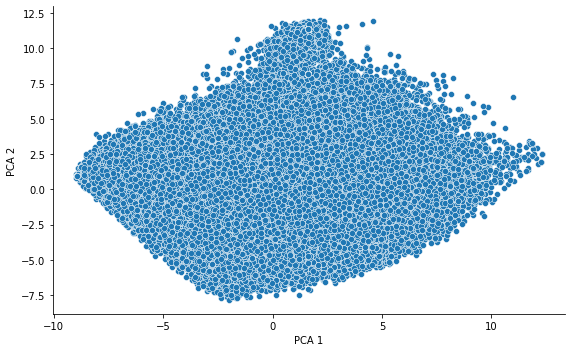

In [5]:
# plt.figure(figsize=(10,10))
# plt.scatter(pca_df[:,0], pca_df[:,1], cmap='plasma')
# plt.xlabel('pc1')
# plt.ylabel('pc2')

sns.relplot(data=pca_df, x='PCA 1', y='PCA 2', aspect=1.61)
# sns.relplot(data=pca_df, x='PCA 1', y='PCA 2', hue=target, hue_order=target_unique, aspect=1.61)
plt.show()